#Salary prediction in Data Science Jobs



##Introduction
In this Notebook, I will conduct an Exploratory Data Analysis on salaries in the field of Data Science, utilizing a Kaggle dataset.

##About the dataset
The dataset was take from Kaggle:
(https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data) and gives information about the salaries in Data Science related jobs.

##Hypothesis
Salaries in Data Science jobs can be predicted based on current information about the positions.

#Objective
Find patterns in the Data Science job dataset that influence salaries. Develop a prediction model based on these patterns.


#Importing libraries and information







In [ ]:
#Import libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
#Mount google drive to get access to data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Indicate the path of the token API
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

#Indicate working directory
%cd /content/gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
#Download the data
#!kaggle datasets download -d hummaamqaasim/jobs-in-data

In [ ]:
#Unzip the data
#!unzip jobs-in-data.zip


In [ ]:
#Open the data
jobs_data = pd.read_csv('jobs_in_data.csv')

#Exploratory Data Analysis

In [ ]:
#Print first rows
jobs_data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [ ]:
#Main statistical metrics of numeric variable
jobs_data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


##Salary distribution in USD


Text(0, 0.5, 'Salary [USD]')

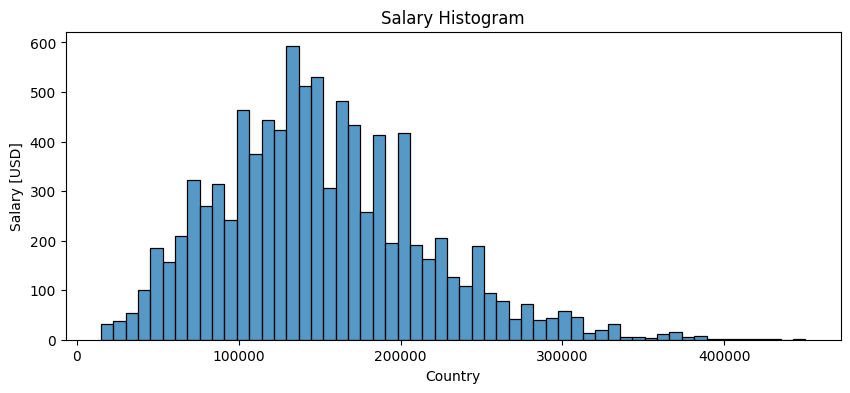

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=jobs_data, x=jobs_data['salary_in_usd'])
plt.title('Salary Histogram')
plt.xlabel('Country')
plt.ylabel('Salary [USD]')

The histogram displays the highest number of observations in salaries between 100,000 and 200,000 USD. The positively skewed histogram indicates that the mode (the most frequent value) is to the left of the average salary. Additionally, it is probable that the dataset contains some high salary outliers.

In [ ]:
from scipy import stats

salary_in_usd_mean = jobs_data['salary_in_usd'].mean()
salary_in_usd_mode = stats.mode(jobs_data['salary_in_usd'])

print(f'{salary_in_usd_mean}')
print(f'{salary_in_usd_mode}')


150299.4955638696
ModeResult(mode=150000, count=206)


As expected, the mode has a lower value than the average salary.

##Mean salary in USD over the years



In [ ]:
mean_salary_by_year = jobs_data.groupby('work_year')['salary_in_usd'].mean()
mean_salary_by_year

work_year
2020    105878.859155
2021    106483.644670
2022    135467.501836
2023    155132.591708
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Salary [USD]')

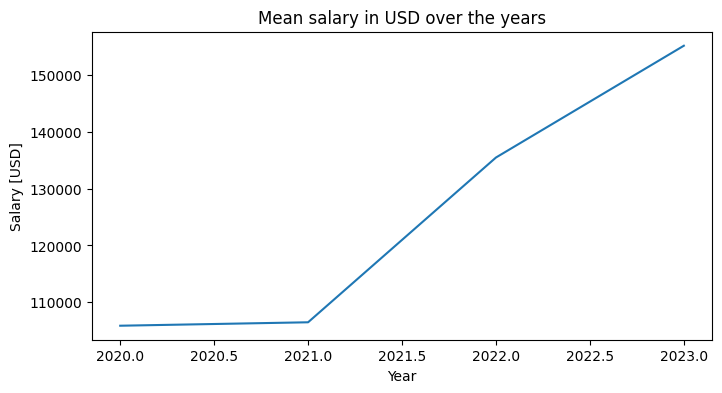

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=mean_salary_by_year)
plt.title('Mean salary in USD over the years')
plt.xlabel('Year')
plt.ylabel('Salary [USD]')

In [ ]:
#Percentage increase between 2020 and 2023
increase = (mean_salary_by_year.loc[2023] - mean_salary_by_year.loc[2020])/mean_salary_by_year.loc[2020] * 100
increase

46.51894905765451

An increase in mean salary in dollars can be observed over the years, with and increase in 46.52% berween 2020 and 2023.






##Mean salary in USD by country

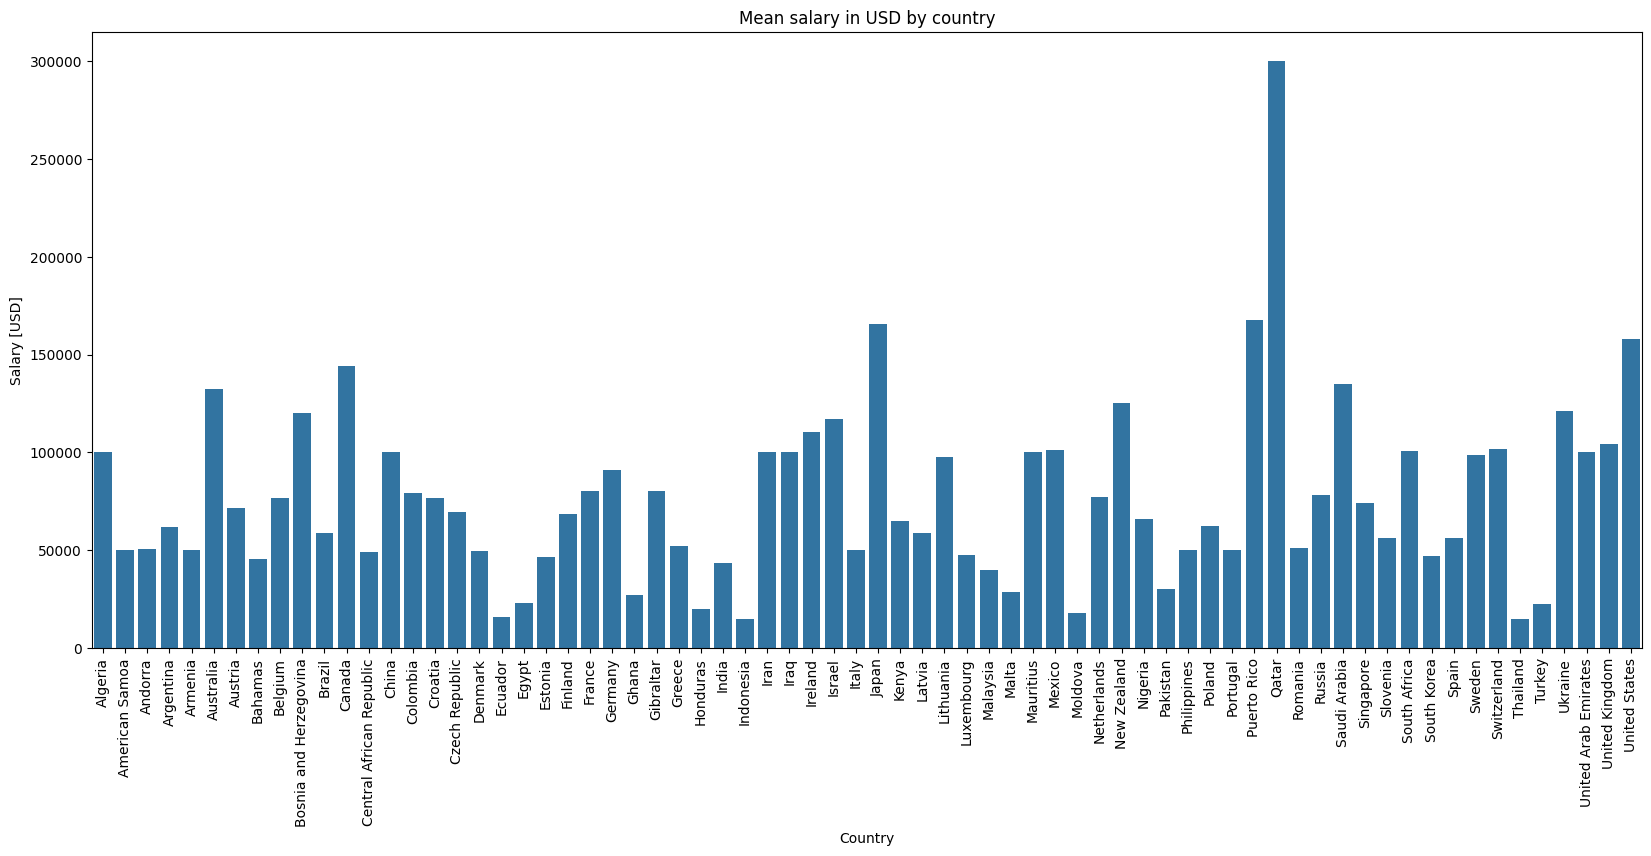

In [ ]:
mean_salary_by_country = jobs_data.groupby('company_location').salary_in_usd.mean()

plt.figure(figsize=(20,8))
sns.barplot(data=mean_salary_by_country)
plt.title('Mean salary in USD by country')
plt.xlabel('Country')
plt.ylabel('Salary [USD]')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True) #Remove top xticks


In [ ]:
mean_salary_by_country[mean_salary_by_country > 150000]

company_location
Japan            165500.000000
Puerto Rico      167500.000000
Qatar            300000.000000
United States    158158.728234
Name: salary_in_usd, dtype: float64


The top mean salary is in Qatar. Other locations with high mean salaries (more than 150000) are: Japan, Puerto Rico, Qatar, United States.


In [ ]:
#Number of salaries above 150000 by country
top_salary = jobs_data[jobs_data['salary_in_usd'] > 150000]
top_salary.groupby('company_location').size()

company_location
Australia            8
Canada              91
France               6
Germany              9
India                1
Ireland              2
Japan                3
Mexico               2
Nigeria              1
Poland               1
Puerto Rico          2
Qatar                1
Russia               1
Saudi Arabia         1
Spain                4
Ukraine              2
United Kingdom      70
United States     3945
dtype: int64

In [ ]:
jobs_data[jobs_data['company_location'] == 'Qatar']

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3026,2023,AI Engineer,Machine Learning and AI,USD,300000,300000,Qatar,Mid-level,Full-time,Remote,Qatar,M


Although the highest mean salary is in Qatar, it has only one observation. Japan and Puerto Rico each have only 3 and 2 observations, respectively, with salaries above 150,000. On the other hand, the US, with an average salary of $158,158.72, has 3945 observations with salaries above 150,000.


##Mean salary in USD by experience level

Text(0, 0.5, 'Salary [USD]')

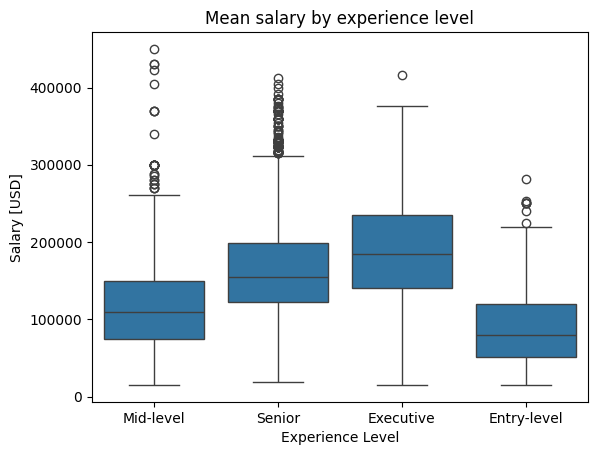

In [ ]:
sns.boxplot(data=jobs_data, x='experience_level', y='salary_in_usd')
plt.title('Mean salary by experience level')
plt.xlabel('Experience Level')
plt.ylabel('Salary [USD]')

As expected, the average salary increases with the rise in seniority. In accordance with our previous prediction, the graph shows several salary outliers, mostly in mid and senior levels





##Mean salary in USD by job category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Data Engineering'),
  Text(1, 0, 'Data Architecture and Modeling'),
  Text(2, 0, 'Data Science and Research'),
  Text(3, 0, 'Machine Learning and AI'),
  Text(4, 0, 'Data Analysis'),
  Text(5, 0, 'Leadership and Management'),
  Text(6, 0, 'BI and Visualization'),
  Text(7, 0, 'Data Quality and Operations'),
  Text(8, 0, 'Data Management and Strategy'),
  Text(9, 0, 'Cloud and Database')])

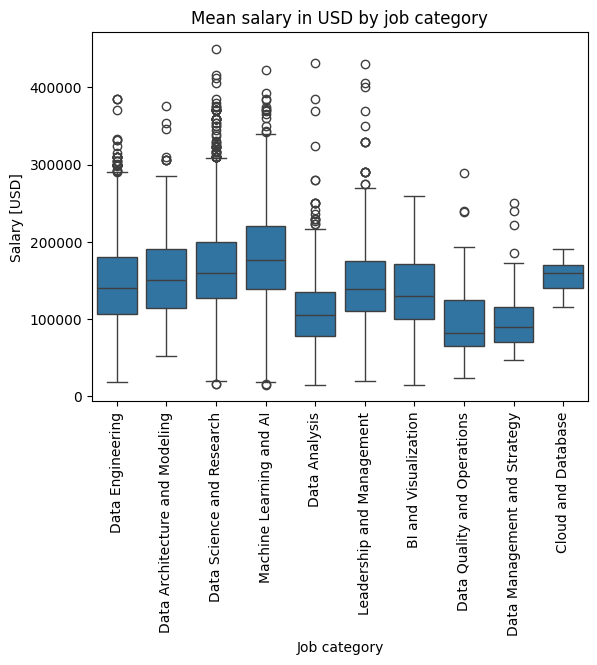

In [ ]:
sns.boxplot(data=jobs_data, x='job_category', y='salary_in_usd')
plt.title('Mean salary in USD by job category')
plt.xlabel('Job category')
plt.ylabel('Salary [USD]')
plt.xticks(rotation=90)



It also can be orbserved that on average, the highest paid position is in the field of Machine Learning and IA.


#Data wrangling
Data wrangling is a crucial step in the data science pipeline where raw data is transformed and cleaned to enhance the performance of future models. In this section, we will carry out the following tasks:

1. Analysis and removal of missing values (NA).
2. Removal of outliers.

In [ ]:
#Sum the null values.
jobs_data.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

There is no missing values

In [ ]:
jobs_data.shape

(9355, 12)

In [ ]:
#Calculate z-score to detect outliers
jobs_data['z_score'] = abs(jobs_data['salary_in_usd'].mean() - jobs_data['salary_in_usd']) / jobs_data['salary_in_usd'].std()
jobs_data.drop(jobs_data[jobs_data['z_score'] > 3].index, inplace=True)

In [ ]:
jobs_data.shape

(9292, 13)

In [ ]:
jobs_data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,z_score
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,0.875115
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,0.565084
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,1.084241
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,0.976623
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,0.902214


#Modelado

In [ ]:
#Import libraries for split the data and transform numerical to categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Selecting target variable(y) and features(X)
y = jobs_data['salary_in_usd']
X = jobs_data[['job_title', 'job_category', 'employee_residence', 'experience_level', 'company_location', 	'company_size']]

#Transform categorical to numerical
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

#Divide into train and split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)




##Decision Tree

In [ ]:
#Import library for Decision Tree and model evaluation
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

#Define a function that tries diferent tree depths
def tree_depth_evaluation(depth,X_train, y_train):
  jobs_tree_model = DecisionTreeRegressor(max_depth=depth)
  jobs_tree_model.fit(X_train, y_train)
  y_pred = jobs_tree_model.predict(X_test)
  mae_tree = mean_absolute_error(y_test, y_pred)
  return mae_tree

#Try different depth for the model
for depth in [1,10,50,500,5000,50000]:
  mae_tree = tree_depth_evaluation(depth, X_train, y_train)
  print(f'Depth:{depth}, MAE: {mae_tree}')

Depth:1, MAE: 45575.23698896259
Depth:10, MAE: 37253.04030928407
Depth:50, MAE: 37287.20788992281
Depth:500, MAE: 37236.85125625849
Depth:5000, MAE: 37304.815878088484
Depth:50000, MAE: 37167.226375636914


In [ ]:
#Create the Decision Tree with the best depth (the one with minimun mae)
jobs_tree_model = DecisionTreeRegressor(max_depth=10)
jobs_tree_model.fit(X_train, y_train)
y_pred_tree = jobs_tree_model.predict(X_test)



In [ ]:
#Evaluate the R2 Score
from sklearn.metrics import r2_score
r2_tree = r2_score(y_test, y_pred_tree)
print(f'R^2: {r2_tree}')

R^2: 0.38111992801296657


##Random Forest


In [ ]:
#Import library for Random forest
from sklearn.ensemble import RandomForestRegressor

#Define a function that tries differents forest depth
def forest_depth_evaluation(depth,X_train, y_train):
  jobs_forest_model = RandomForestRegressor(max_depth=depth, random_state=42)
  jobs_forest_model.fit(X_train, y_train)
  y_pred = jobs_forest_model.predict(X_test)
  mae_tree = mean_absolute_error(y_test, y_pred)
  return mae_tree

#Try different depth for the model
for depth in [1,10,50,500,5000,50000]:
  mae_forest = forest_depth_evaluation(depth, X_train, y_train)
  print(f'Depth:{depth}, MAE: {mae_forest}')

Depth:1, MAE: 45454.9912590118
Depth:10, MAE: 36762.90945766246
Depth:50, MAE: 36618.5743896564
Depth:500, MAE: 36617.76742156001
Depth:5000, MAE: 36617.76742156001
Depth:50000, MAE: 36617.76742156001


In [ ]:
#Create a Random forest model with the best depth (the one with minimun mae)
jobs_forest_model = RandomForestRegressor(max_depth=500)
jobs_tree_model.fit(X_train, y_train)
y_pred_forest = jobs_tree_model.predict(X_test)

In [ ]:
#Evaluate the R2 Score
from sklearn.metrics import r2_score
r2_forest = r2_score(y_test, y_pred_forest)
print(f'R^2: {r2_tree}')

R^2: 0.38111992801296657


##Linear Regression

In [ ]:
#Import library for Linear Regression model
from sklearn.linear_model import LinearRegression

#Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Make predictions
y_pred_linear = linear_model.predict(X_test)

#Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_linear


37085.82139757919